In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Simple Linear Regression

### Membuat dataset

In [9]:
df_simple = pd.read_csv('./bahan/Salinan advertising.csv')

In [10]:
df_simple.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
df_simple.shape

(200, 4)

In [12]:
df_simple.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
df_simple.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## EDA (Exploratory Data Analysis)

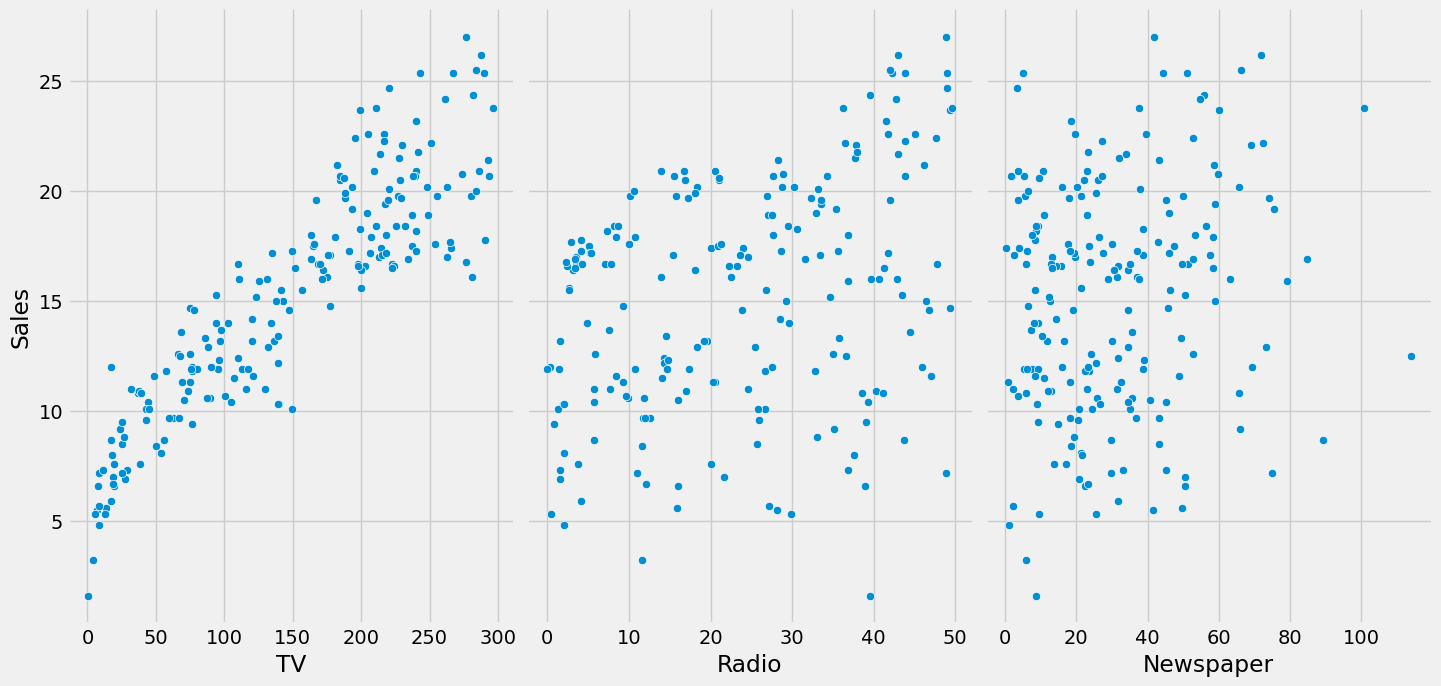

In [14]:
import seaborn as sns

sns.pairplot(df_simple, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7)
plt.show()

In [15]:
lr = LinearRegression()

In [16]:
X = df_simple[["TV"]]
y = df_simple["Sales"]

### Train Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_pred = lr.predict(X_test)

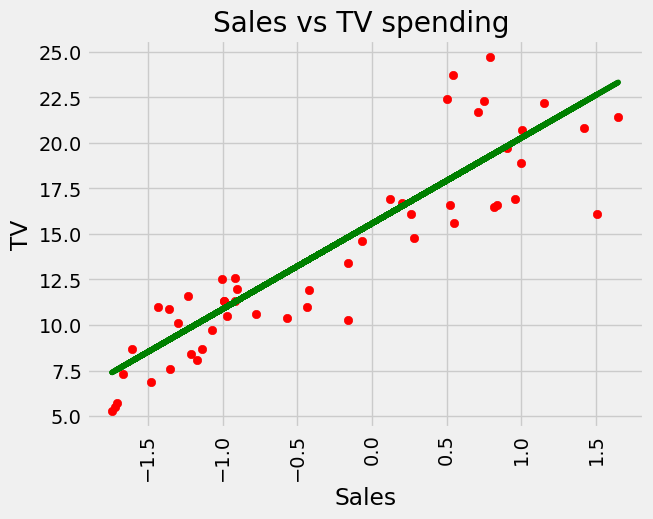

In [21]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, lr.predict(X_test), color = "green")
plt.title("Sales vs TV spending ")
plt.xlabel("Sales")
plt.ylabel("TV")
plt.xticks(rotation=90)
plt.show()

### R Squared Score

In [22]:
print("R2 Score is :",round(r2_score(y_test,y_pred),3)*100,"%")

R2 Score is : 79.7 %


### pakai xgboot

In [24]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("R2 Score is :",round(r2_score(y_test,y_pred),3)*100,"%")

R2 Score is : 80.7 %


## feature selecion

In [25]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

X = df_simple[["TV", "Radio", "Newspaper"]]
y = df_simple["Sales"]

In [26]:
lm1 = LinearRegression().fit(X[["TV", "Newspaper"]], y)
lm1_preds = lm1.predict(X[["TV", "Newspaper"]])

r_squared = r2_score(y, lm1_preds)
adjusted_r_squared = 1 - (1 - r_squared) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print("R-squared:", r_squared)

R-squared: 0.8236419280498489


In [27]:
lm2 = LinearRegression().fit(X[["TV", "Radio"]], y)
lm2_preds = lm2.predict(X[["TV", "Radio"]])

r_squared2 = r2_score(y, lm2_preds)
adjusted_r_squared2 = 1 - (1 - r_squared2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print("R-squared:", r_squared2)

R-squared: 0.9025896186081139


In [28]:
lm3 = LinearRegression().fit(X[["TV", "Radio", "Newspaper"]], y)
lm3_preds = lm3.predict(X[["TV", "Radio", "Newspaper"]])

r_squared3 = r2_score(y, lm3_preds)
adjusted_r_squared3 = 1 - (1 - r_squared3) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print("R-squared:", r_squared3)

R-squared: 0.9025912899684558


In [29]:
lm4 = XGBRegressor().fit(X[["TV", "Radio", "Newspaper"]], y)
lm4_preds = lm4.predict(X[["TV", "Radio", "Newspaper"]])

r_squared4 = r2_score(y, lm4_preds)
adjusted_r_squared4 = 1 - (1 - r_squared4) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print("R-squared:", r_squared4)

R-squared: 0.999999267589518


## model Eval

In [33]:
from sklearn.metrics import mean_squared_error


X = df_simple[["TV", "Radio", "Newspaper"]]
y = df_simple["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
r2 = r2_score(y_test, xgb_preds)
adjusted_r_squared5 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print("RMSE", np.sqrt(mean_squared_error(y_test, xgb_preds)))
print("R-squared:", r2_score(y_test, xgb_preds))
print("adjusted R2 :", adjusted_r_squared5)

RMSE 1.3114291937009455
R-squared: 0.9367342960109213
adjusted R2 : 0.9357659433988436
